In [13]:
import sys
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
sys.path.append('/home/christoph/Technician-Vehicle-Routing-Optimization')
from alns.Problem import Problem
import alns.TVRPAlgorithms as tvrp
from alns.ALNS import ALNS
from alns.criteria import HillClimbing, SimulatedAnnealing, RecordToRecordTravel, ThresholdAcceptance

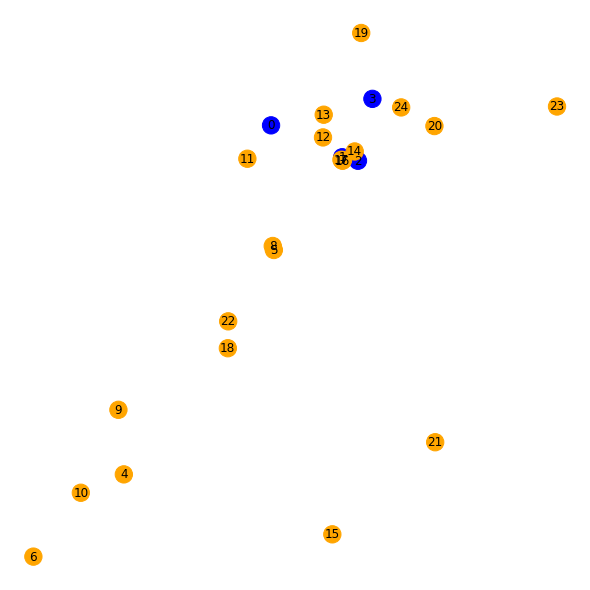

In [14]:
p = Problem("/home/christoph/Technician-Vehicle-Routing-Optimization/examples/Datasets/Data_1.csv", "/home/christoph/Technician-Vehicle-Routing-Optimization/examples/Datasets/Matrix_1.json")
plt.rcParams["figure.figsize"]=8,8
Graph = p.plot()

# Clustering

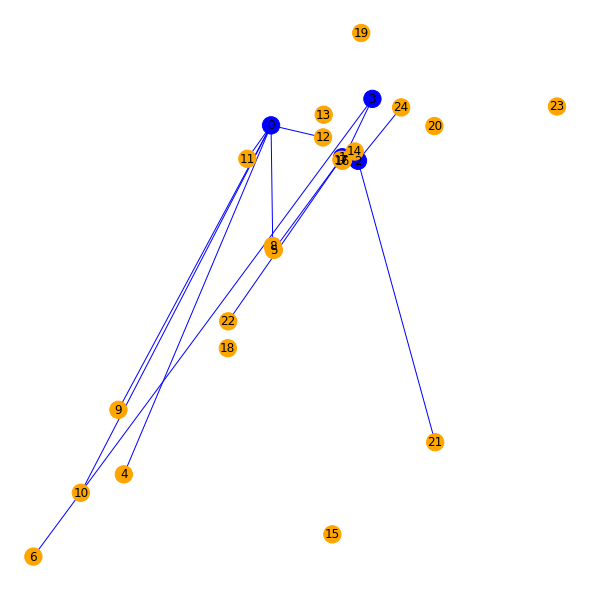

In [15]:
Graph, solution = tvrp.parallelUrgencyAssignment(p, True)

In [16]:
print("Anteil der Kunden in der Holding List",  len(solution.unassignedRequests)/len(solution.problem.demand))

Anteil der Kunden in der Holding List 0.3333333333333333


# Routing

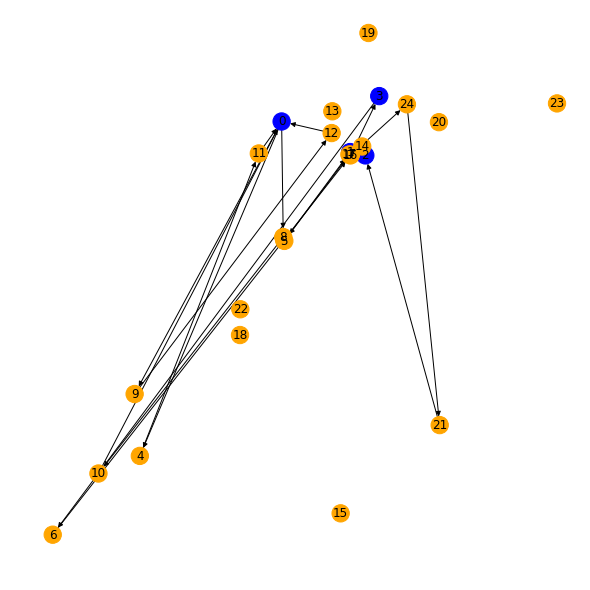

In [17]:
tvrp.buildSolutionParallelStyle(solution)
Graph = solution.toGraph()

In [18]:
print("Kosten der Lösung: ", solution.objective())

print("Anteil der Kunden in der Holding List",  len(solution.unassignedRequests)/len(p.demand))

Kosten der Lösung:  3039.70658
Anteil der Kunden in der Holding List 0.38095238095238093


# ALNS mit Simulated Annealing 

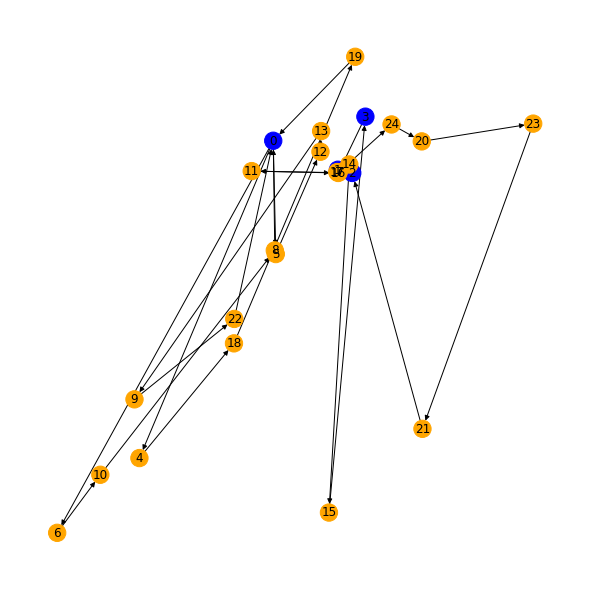

In [28]:
alns = ALNS()
alns.add_destroy_operator(tvrp.randomRemoval)
alns.add_destroy_operator(tvrp.distancedBasedWorstRemoval)
alns.add_destroy_operator(tvrp.timeBasedWorstRemoval)
alns.add_destroy_operator(tvrp.relatedRemoval)
alns.add_repair_operator(tvrp.greedyInsertion)
alns.add_repair_operator(tvrp.k_regretInsertion)
criterion = SimulatedAnnealing(1000, 0.0001, 0.95, method = "exponential")

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.6, criterion, iterations=1000, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()

Kosten der Lösung:  34.151610000000005
Anteil der Kunden in der Holding List 0.0


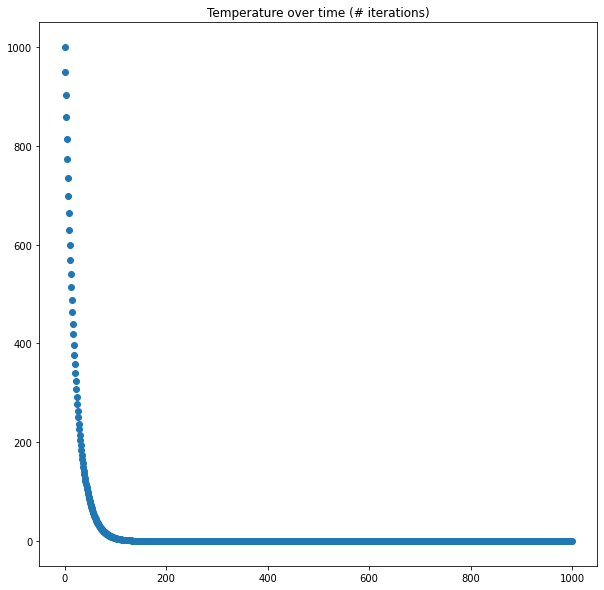

In [29]:
print("Kosten der Lösung: ", optimized.objective())
print("Anteil der Kunden in der Holding List",  len(optimized.unassignedRequests)/len(p.demand))
criterion.plotAnalytics()

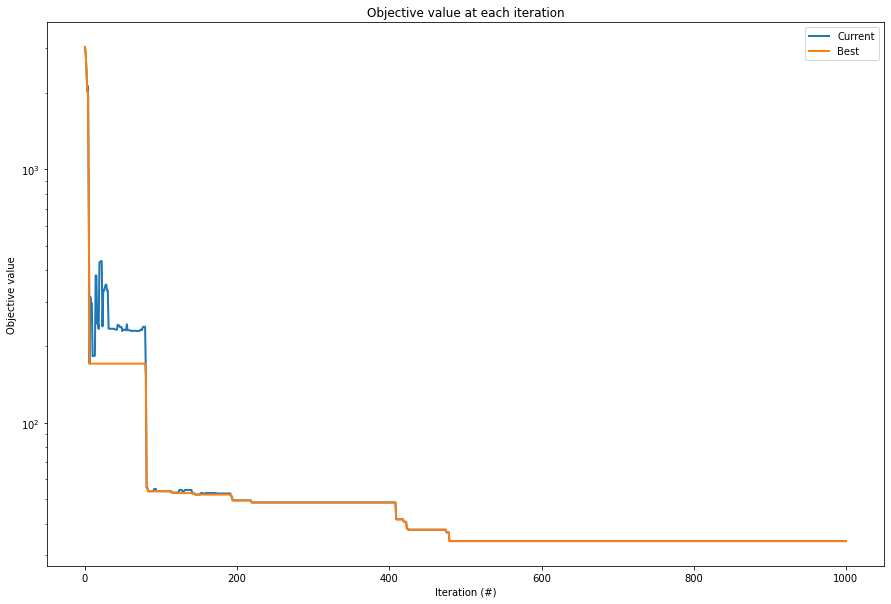

In [30]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

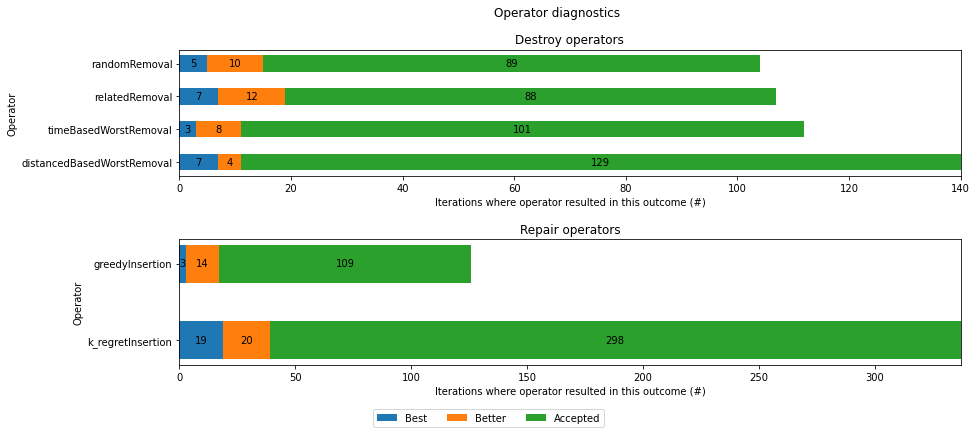

In [31]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])

# ALNS mit Threshold Acceptance

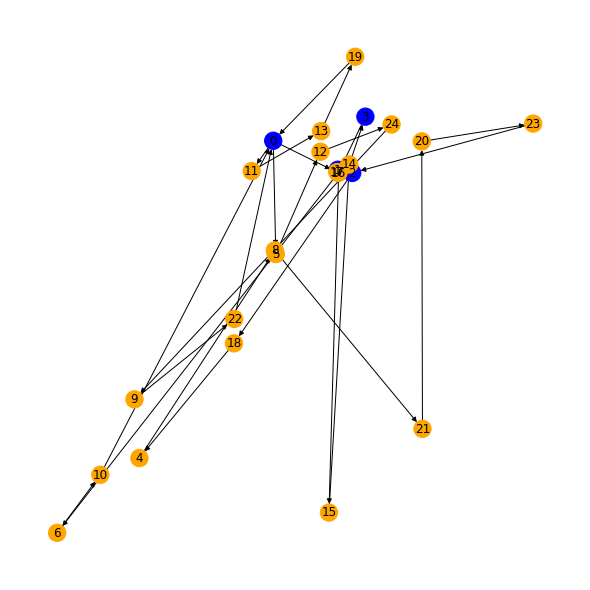

In [40]:
alns = ALNS()
alns.add_destroy_operator(tvrp.randomRemoval)
alns.add_destroy_operator(tvrp.distancedBasedWorstRemoval)
alns.add_destroy_operator(tvrp.timeBasedWorstRemoval)
alns.add_destroy_operator(tvrp.relatedRemoval)
alns.add_repair_operator(tvrp.greedyInsertion)
alns.add_repair_operator(tvrp.k_regretInsertion)
criterion = ThresholdAcceptance(0.25, 0.00000000001, 0.00025, method = "linear")

result = alns.iterate(solution, [3, 2, 1, 0.5], 0.6, criterion, iterations=1000, collect_stats=True)

optimized = result.best_state

Graph = optimized.toGraph()

In [41]:
print("Kosten der Lösung: ", optimized.objective())
print("Anteil der Kunden in der Holding List",  len(optimized.unassignedRequests)/len(p.demand))

Kosten der Lösung:  30.569980000000005
Anteil der Kunden in der Holding List 0.0


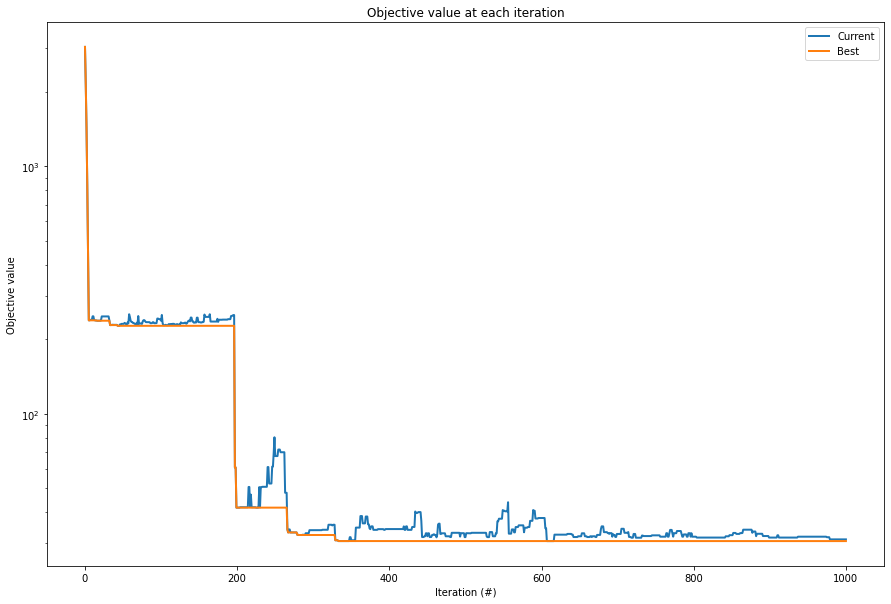

In [42]:
_, ax = plt.subplots(figsize=(15, 10))
ax.set_yscale('log')
result.plot_objectives(ax=ax, lw=2)

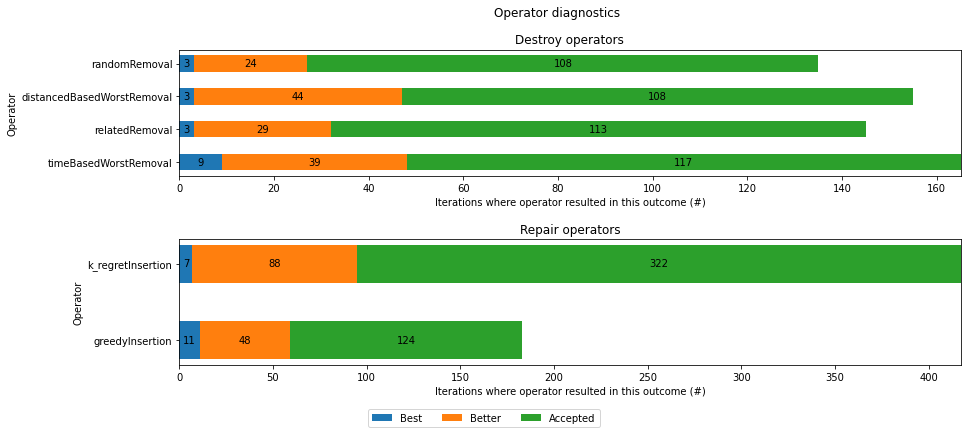

In [43]:
figure = plt.figure("operator_counts", figsize=(14, 6))
figure.subplots_adjust(bottom=0.15, hspace=.5)
result.plot_operator_counts(figure=figure, title="Operator diagnostics", legend=["Best", "Better", "Accepted"])